In [1]:
#Import libraries
os.chdir("/home/robbe/ionbot/Fragpipe_results")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import os
from pathlib import Path
from pyteomics import mass as pymass
import OxiAnalysis as OA
import importlib
importlib.reload(OA)
import warnings; warnings.simplefilter('ignore')

Pseudo:

for each file in project:

    make sets for ionbot en fragpipe (en pfind)

    bereken union en intersection

    tel iedere union en iedere intersection op bij elkaar
    
    steek dit in venn diagram

### Fragpipe

In [2]:
f022545 = pd.read_csv("/home/robbe/ionbot/Fragpipe_results/PXD022545withquant/PXD022545quant.tsv", sep="\t")

In [3]:
f022545.shape

(119985, 38)

In [4]:
f022545["Spectrum File"].unique()

array(['C:\\Users\\robbe\\Fragpipe_results\\PXD022545withquant\\Control_1\\interact.pep.xml',
       'C:\\Users\\robbe\\Fragpipe_results\\PXD022545withquant\\Control_2\\interact.pep.xml',
       'C:\\Users\\robbe\\Fragpipe_results\\PXD022545withquant\\Control_3\\interact.pep.xml',
       'C:\\Users\\robbe\\Fragpipe_results\\PXD022545withquant\\H2O2_1\\interact.pep.xml',
       'C:\\Users\\robbe\\Fragpipe_results\\PXD022545withquant\\H2O2_2\\interact.pep.xml',
       'C:\\Users\\robbe\\Fragpipe_results\\PXD022545withquant\\H2O2_3\\interact.pep.xml'],
      dtype=object)

In [5]:
fragpipe_list = f022545.groupby(["Peptide", "Spectrum File"])["Spectrum"].count().reset_index()

In [6]:
FControl1 = fragpipe_list[fragpipe_list['Spectrum File'].str.contains("Control_1")]
FControl2 = fragpipe_list[fragpipe_list["Spectrum File"].str.contains("Control_2")]
FControl3 = fragpipe_list[fragpipe_list["Spectrum File"].str.contains("Control_3")]
FTreatment1 = fragpipe_list[fragpipe_list["Spectrum File"].str.contains("H2O2_1")]
FTreatment2 = fragpipe_list[fragpipe_list["Spectrum File"].str.contains("H2O2_2")]
FTreatment3 = fragpipe_list[fragpipe_list["Spectrum File"].str.contains("H2O2_3")]
Fragpipesubs = [FControl1, FControl2, FControl3, FTreatment1, FTreatment2, FTreatment3]

In [7]:
FControl1

,Peptide,Spectrum File,Spectrum
0,AAAAAAAAAAK,C:\Users\robbe\Fragpipe_results\PXD022545withq...,2
5,AAAAAAAAAPAAAATAPTTAATTAATAAQ,C:\Users\robbe\Fragpipe_results\PXD022545withq...,1
8,AAAAAAAGDSDSWDADAFSVEDPVRK,C:\Users\robbe\Fragpipe_results\PXD022545withq...,1
10,AAAAAAALQAK,C:\Users\robbe\Fragpipe_results\PXD022545withq...,1
15,AAAAAEQQQFYLLLGNLLSPDNVVR,C:\Users\robbe\Fragpipe_results\PXD022545withq...,1
...,...,...,...
72133,YYHLTHDELISLLLQR,C:\Users\robbe\Fragpipe_results\PXD022545withq...,1
72149,YYTSASGDEMVSLK,C:\Users\robbe\Fragpipe_results\PXD022545withq...,3
72155,YYTVFDR,C:\Users\robbe\Fragpipe_results\PXD022545withq...,2
72160,YYTVFDRDNNR,C:\Users\robbe\Fragpipe_results\PXD022545withq...,1


### ionbot

In [8]:
ionbot = pd.read_csv("/home/robbe/ionbot/full_projects_/PXD022545/PXD022545_first.csv")
ionbot.head()

,Unnamed: 0,ionbot_match_id,spectrum_title,scan,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,...,Organism,Cell line,Oxidant treatment,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting
0,0,0_8_1,controllerType=0 controllerNumber=1 scan=10,10,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,790.34769,790.34568,0.88133,2,EAADTER,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First
1,1,0_7572_1,controllerType=0 controllerNumber=1 scan=10006,10006,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1911.78352,1911.78054,1163.81700,4,SEEAHAEDSVMDHHFR,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First
2,2,0_7573_4,controllerType=0 controllerNumber=1 scan=10007,10007,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,762.36667,762.36603,1163.86404,2,GTFPDAR,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First
3,3,0_7574_2,controllerType=0 controllerNumber=1 scan=10008,10008,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,939.45005,939.44836,1163.91264,2,VMEYINR,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First
4,4,0_7575_1,controllerType=0 controllerNumber=1 scan=10010,10010,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,895.40507,895.40354,1164.25452,2,ESFDGSVR,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First


In [9]:
i = ionbot.groupby(["matched_peptide", "spectrum_file"])["ionbot_match_id"].count().reset_index()
i.head()

,matched_peptide,spectrum_file,ionbot_match_id
0,AAAAAAAAAVSR,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1
1,AAAAAAAGDSDSWDADAFSVEDPVRK,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1
2,AAAAAAALQAK,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1
3,AAAAAAALQAK,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1
4,AAAAAAALQAK,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1


In [10]:
iControl1 = i[i["spectrum_file"].str.contains("CTRL_01")]
iControl2 = i[i['spectrum_file'].str.contains("CTRL_02")]
iControl3 = i[i['spectrum_file'].str.contains("CTRL_03")]
iTreatment1 = i[i["spectrum_file"].str.contains("H2O2_01")]
iTreatment2 = i[i["spectrum_file"].str.contains("H2O2_02")]
iTreatment3 = i[i["spectrum_file"].str.contains("H2O2_03")]
ionbotsubs = [iControl1, iControl2, iControl3, iTreatment1, iTreatment2, iTreatment3]

### pFind

In [11]:
pFind = pd.read_csv("/home/robbe/ionbot/pFind_results/result/pFind-Filtered.spectra", sep="\t")

In [12]:
p = pFind.groupby(["Sequence", "File_Name"])["Scan_No"].count().reset_index()

In [13]:
pControl1 = p[p["File_Name"].str.contains("CTRL_01")]
pControl2 = p[p['File_Name'].str.contains("CTRL_02")]
pControl3 = p[p['File_Name'].str.contains("CTRL_03")]
pTreatment1 = p[p["File_Name"].str.contains("H2O2_01")]
pTreatment2 = p[p["File_Name"].str.contains("H2O2_02")]
pTreatment3 = p[p["File_Name"].str.contains("H2O2_03")]
pFindsubs = [pControl1, pControl2, pControl3, pTreatment1, pTreatment2, pTreatment3]

In [14]:
pControl1.shape

(6256, 3)

In [15]:
iControl1.shape

(14758, 3)

In [16]:
FControl1.shape

(14572, 3)

### plots

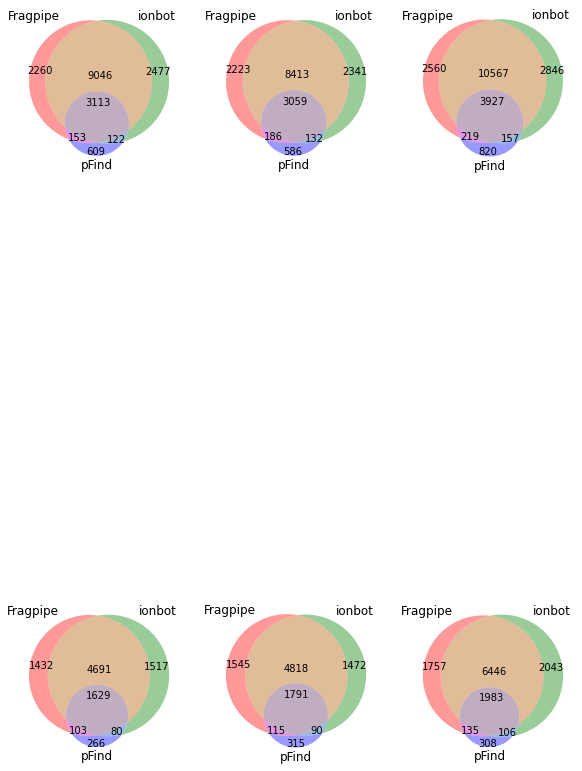

In [17]:
from matplotlib_venn import venn3

Tot = 6
Cols = 3
# Compute Rows required

Rows = Tot // Cols 

#     EDIT for correct number of rows:
#     If one additional row is necessary -> add one:

if Tot % Cols != 0:
    Rows += 1

# Create a Position index

Position = range(1,Tot + 1)
fig = plt.figure(1)
fig.set_size_inches(10,20)
for k in range(Tot):

    ax = fig.add_subplot(Rows,Cols,Position[k])
       # Or whatever you want in the subplot

    fragpipesub = Fragpipesubs[k]
    ionbotsub = ionbotsubs[k]
    pFindsub = pFindsubs[k]
    fragpipeset = set(fragpipesub["Peptide"])
    ionbotset = set(ionbotsub["matched_peptide"])
    pfindset = set(pFindsub["Sequence"])
    
    venn3([fragpipeset, ionbotset, pfindset], ('Fragpipe', 'ionbot', 'pFind'))
plt.show()
    

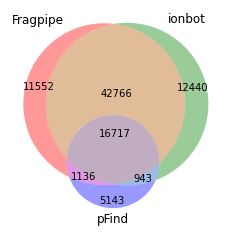

In [18]:
venn3(subsets = ((2204+2176+2513+1410+1527+1722),(2423+2291+2798+1488+1445+1995), (8746+8185+10270+4608+4715+6242),(1148+1003+1357+466+540+629),(209+233+266+125+133+170),(176+182+205+109+117+154),(3413+3287+4224+1712+1894+2187)), set_labels = ('Fragpipe', 'ionbot', 'pFind'))

Comparison at unique peptide sequence level

## MSFragger Fingerprint

## FlashLFQ

In [19]:
FragFlash = pd.read_csv("/home/robbe/ionbot/Fragpipe_results/PXD022545/flashlfq/QuantifiedPeptides.tsv", sep= "\t")
FragFlash.drop(list(FragFlash.filter(regex = 'Detection Type')), axis = 1, inplace = True)
FragFlash = FragFlash[~FragFlash["Protein Groups"].isin(OA.nonhumancontams)]


In [20]:
cols = ['Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234',
       'Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719',
       'Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239',
       'Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01',
       'Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02',
       'Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03']

In [21]:
OA.quantile_transform(FragFlash, cols)

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17
0,AAAAAAAAAAK|nan|nan,AAAAAAAAAAK,P50914,NaN,NaN,3.347205,3.592792,3.185331,3.623461,NaN,2.681727,NaN
1,AAAAAAAAAPAAAATAPTTAATTAATAAQ|nan|nan,AAAAAAAAAPAAAATAPTTAATTAATAAQ,P37108,NaN,NaN,4.451115,4.606993,4.778747,4.984895,3.576159,4.761252,NaN
2,AAAAAAAGDSDSWDADAFSVEDPVRK|N-term(42.0106)|Mod...,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAAAAAGDSDSWDADAFSVEDPVRK|N-term(42.0106)|nan,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,NaN,NaN,4.394033,4.310659,4.025095,5.035435,3.353301,3.777300,NaN
4,AAAAAAALQAK|nan|nan,AAAAAAALQAK,P36578,NaN,NaN,6.426158,6.096485,6.795224,6.323185,6.051319,6.689200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
39449,YYTVFDR|nan|nan,YYTVFDR,P07339,NaN,NaN,6.565748,6.747986,6.718784,6.827719,6.676514,6.758155,NaN
39450,YYTVFDRDNNR|nan|nan,YYTVFDRDNNR,P07339,NaN,NaN,5.835174,5.458968,NaN,6.072475,6.217894,6.121602,NaN
39451,YYVTIIDAPGHR|nan|nan,YYVTIIDAPGHR,Q5VTE0,NaN,NaN,6.806301,6.892804,7.139302,6.679609,6.404353,7.191737,NaN
39452,YYVTIIDAPGHRDFIK|nan|nan,YYVTIIDAPGHRDFIK,Q5VTE0,NaN,NaN,5.330428,5.586500,5.981746,4.887150,2.680061,5.841174,NaN


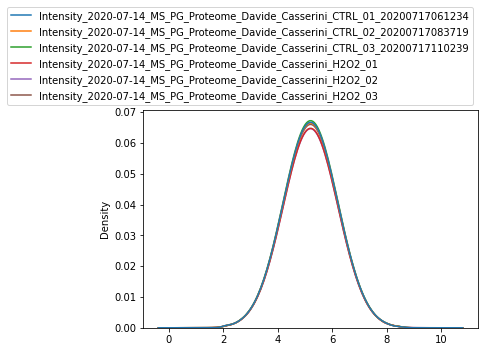

In [22]:
ax = sns.kdeplot(data=FragFlash[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

In [23]:
FragFlash["Assigned Mods"] = FragFlash["Sequence"].apply(lambda x: x.split("|")[1])
FragFlash["Open Mods"] = FragFlash["Sequence"].apply(lambda x: x.split("|")[2])

In [24]:
FragFlash

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17,Assigned Mods,Open Mods
0,AAAAAAAAAAK|nan|nan,AAAAAAAAAAK,P50914,NaN,NaN,3.347205,3.592792,3.185331,3.623461,NaN,2.681727,NaN,nan,nan
1,AAAAAAAAAPAAAATAPTTAATTAATAAQ|nan|nan,AAAAAAAAAPAAAATAPTTAATTAATAAQ,P37108,NaN,NaN,4.451115,4.606993,4.778747,4.984895,3.576159,4.761252,NaN,nan,nan
2,AAAAAAAGDSDSWDADAFSVEDPVRK|N-term(42.0106)|Mod...,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N-term(42.0106),"Mod1: First isotopic peak, Mod2: monomethylati..."
3,AAAAAAAGDSDSWDADAFSVEDPVRK|N-term(42.0106)|nan,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,NaN,NaN,4.394033,4.310659,4.025095,5.035435,3.353301,3.777300,NaN,N-term(42.0106),nan
4,AAAAAAALQAK|nan|nan,AAAAAAALQAK,P36578,NaN,NaN,6.426158,6.096485,6.795224,6.323185,6.051319,6.689200,NaN,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39449,YYTVFDR|nan|nan,YYTVFDR,P07339,NaN,NaN,6.565748,6.747986,6.718784,6.827719,6.676514,6.758155,NaN,nan,nan
39450,YYTVFDRDNNR|nan|nan,YYTVFDRDNNR,P07339,NaN,NaN,5.835174,5.458968,NaN,6.072475,6.217894,6.121602,NaN,nan,nan
39451,YYVTIIDAPGHR|nan|nan,YYVTIIDAPGHR,Q5VTE0,NaN,NaN,6.806301,6.892804,7.139302,6.679609,6.404353,7.191737,NaN,nan,nan
39452,YYVTIIDAPGHRDFIK|nan|nan,YYVTIIDAPGHRDFIK,Q5VTE0,NaN,NaN,5.330428,5.586500,5.981746,4.887150,2.680061,5.841174,NaN,nan,nan


Oke, doe dit:
- Als er een theoretical peak is: pak die
- Als er meerdere theoretical peaks zijn: pak gemiddelde (zou normaal toch heel dicht bij mekaar moeten liggen)
- Als er geen theoretical peak is: pak peakApex, als er meerdere peakApex zijn, neem gemiddelde van peakApex (zou normaal heel dicht bij elkaar moeten liggen)

In [25]:
FragFlash["Assigned Mass Shift"] = FragFlash["Assigned Mods"].str.findall(r"\((.*?)\)")
FragFlash["Assigned Mass Shift"].fillna(0, inplace=True)
FragFlash["Assigned Mass Shift"] = FragFlash["Assigned Mass Shift"].apply(lambda x: [float(i) for i in x] if type(x)==list else x)
FragFlash["Assigned Mass Shift"] = FragFlash["Assigned Mass Shift"].apply(lambda x: sum(x) if type(x) == list else x)

In [26]:
def openMassShift(string):
    masshift = 0
    theoretical = re.compile(r"Theoretical: (.*?)\)")
    theoreticallist= re.findall(pattern= theoretical, string=string)
    tmp = 0
    if len(theoreticallist) != 0:
        for i in theoreticallist:
            tmp += float(i)
        masshift = tmp/len(theoreticallist)
    else:
        peakapex = re.compile(r"PeakApex: (.*?)\)")
        peakapexlist = re.findall(pattern=peakapex, string=string)
        if len(peakapexlist) > 0:
            for i in peakapexlist:
                tmp += float(i)
            masshift = tmp/len(peakapexlist)
        else:
            masshift = 0
    
    return masshift

In [27]:
FragFlash["Open Mass Shift"] = FragFlash["Open Mods"].apply(openMassShift)
FragFlash["Total Mass Shift"] = (FragFlash["Open Mass Shift"] + FragFlash["Assigned Mass Shift"]).round(2)

In [28]:
FragFlash.head()

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17,Assigned Mods,Open Mods,Assigned Mass Shift,Open Mass Shift,Total Mass Shift
0,AAAAAAAAAAK|nan|nan,AAAAAAAAAAK,P50914,NaN,NaN,3.347205,3.592792,3.185331,3.623461,NaN,2.681727,NaN,nan,nan,0.0000,0.0000,0.00
1,AAAAAAAAAPAAAATAPTTAATTAATAAQ|nan|nan,AAAAAAAAAPAAAATAPTTAATTAATAAQ,P37108,NaN,NaN,4.451115,4.606993,4.778747,4.984895,3.576159,4.761252,NaN,nan,nan,0.0000,0.0000,0.00
2,AAAAAAAGDSDSWDADAFSVEDPVRK|N-term(42.0106)|Mod...,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N-term(42.0106),"Mod1: First isotopic peak, Mod2: monomethylati...",42.0106,19.0302,61.04
3,AAAAAAAGDSDSWDADAFSVEDPVRK|N-term(42.0106)|nan,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,NaN,NaN,4.394033,4.310659,4.025095,5.035435,3.353301,3.777300,NaN,N-term(42.0106),nan,42.0106,0.0000,42.01
4,AAAAAAALQAK|nan|nan,AAAAAAALQAK,P36578,NaN,NaN,6.426158,6.096485,6.795224,6.323185,6.051319,6.689200,NaN,nan,nan,0.0000,0.0000,0.00


In [29]:
No_zero = FragFlash[FragFlash["Total Mass Shift"] != 0]
g = No_zero.groupby("Total Mass Shift").sum().reset_index()

In [30]:
g

,Total Mass Shift,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17,Assigned Mass Shift,Open Mass Shift
0,-144.05,0.0,0.0,27.507902,26.831885,25.736552,26.427005,26.133643,25.217309,0.0,0.0000,-720.2670
1,-137.06,0.0,0.0,11.146367,10.832330,11.112600,11.517867,11.363985,11.024045,0.0,0.0000,-274.1178
2,-128.10,0.0,0.0,53.710802,54.337191,44.025807,42.513300,29.374410,36.509047,0.0,0.0000,-2433.8050
3,-128.06,0.0,0.0,16.439631,9.875376,10.171432,10.171094,9.981985,9.928737,0.0,0.0000,-384.1758
4,-127.11,0.0,0.0,25.440223,25.691600,25.627629,24.181150,25.117943,25.459747,0.0,0.0000,-635.5540
...,...,...,...,...,...,...,...,...,...,...,...,...
926,497.25,0.0,0.0,13.160041,16.906246,12.496021,16.372722,15.130173,15.917717,0.0,0.0000,1491.7482
927,529.19,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,529.1875,0.0000
928,551.20,0.0,0.0,10.632422,11.991721,10.637999,10.049990,8.853799,8.901329,0.0,114.0428,988.3496
929,604.22,0.0,0.0,4.889772,4.002582,5.082863,4.545220,4.766456,5.498277,0.0,114.0428,490.1742


In [31]:
from statistics import median
g['medianCtrl']=g.apply(lambda x:median([x[c] for c in g.columns if "CTRL" in c]),axis=1)
g["medianH2O2"]=g.apply(lambda x:median([x[c] for c in g.columns if "H2O2" in c]), axis=1)
g["Difference"] = (g["medianH2O2"] - g["medianCtrl"])

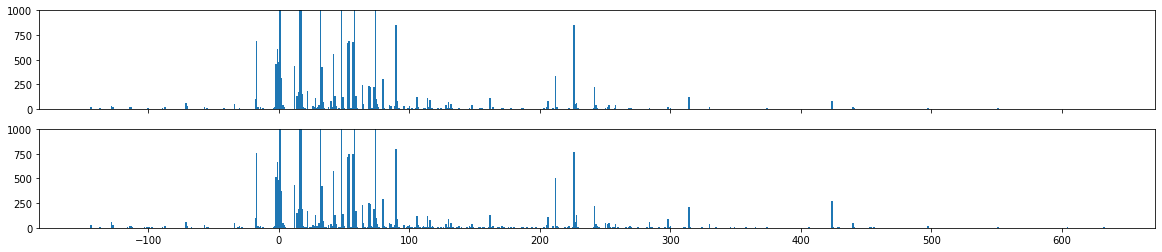

In [32]:
fig, (ax1,ax2) = plt.subplots(ncols = 1, nrows=2, sharey = True, sharex=True)
# sns.barplot(ax = axes[0], data=gfiltered, x="Delta_mass", y="meanH2O2")
# sns.barplot(ax = axes[1], data=gfiltered, x="Delta_mass", y="meanCtrl")
ax1.bar(x=g["Total Mass Shift"], height=g.medianH2O2, width=1.2)
ax2.bar(x=g["Total Mass Shift"], height=g.medianCtrl, width=1.2)

fig.set_size_inches(20,4)
plt.ylim(0,1000)
plt.show()

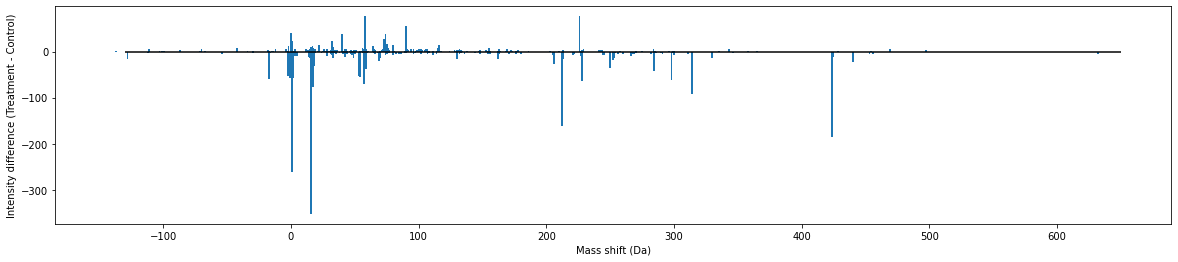

In [33]:
fig, ax = plt.subplots()
# ax = sns.barplot(data=gfiltered, x="Delta_mass", y="Quotient")
ax.bar(x=g["Total Mass Shift"], height=g.Difference, width=1.4)
fig.set_size_inches(20,4)
plt.hlines(y=0,xmin=-130, xmax=650, color="k")
plt.xlabel("Mass shift (Da)")
plt.ylabel("Intensity difference (Treatment - Control)")
# plt.ylim(0,7000)
# plt.xticks([0,10,20,30,40,50,60,70,80,90,100])

plt.show()

In [34]:
sorted = g.sort_values(by="Difference", axis=0, ascending=False)

In [37]:
FragFlash[FragFlash["Total Mass Shift"] == 226]

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17,Assigned Mods,Open Mods,Assigned Mass Shift,Open Mass Shift,Total Mass Shift
485,ACANPAAGSVILLENLR|2C(57.0214)|Mod1: Unannotate...,ACANPAAGSVILLENLR,P00558,NaN,NaN,4.695214,4.200469,4.575399,3.960665,5.339906,4.264531,NaN,2C(57.0214),Mod1: Unannotated mass-shift 168.9756 (PeakApe...,57.0214,168.9756,226.0
505,ACLISLGYDVENDRQGEAEFNR|2C(57.0214)|Mod1: Unann...,ACLISLGYDVENDRQGEAEFNR,O43707,NaN,NaN,4.791686,4.065976,4.622672,3.962693,4.740704,3.685290,NaN,2C(57.0214),Mod1: Unannotated mass-shift 168.9756 (PeakApe...,57.0214,168.9756,226.0
576,ADFCIIHYAGK|4C(57.0214)|Mod1: Unannotated mass...,ADFCIIHYAGK,P35579,NaN,NaN,5.379679,4.574936,5.244252,5.156061,5.062184,5.726570,NaN,4C(57.0214),Mod1: Unannotated mass-shift 168.9756 (PeakApe...,57.0214,168.9756,226.0
615,ADHQPLTEASYVNLPTIALCNTDSPLR|20C(57.0214)|Mod1:...,ADHQPLTEASYVNLPTIALCNTDSPLR,P08865,NaN,NaN,6.067867,5.518965,5.789696,5.919716,6.325241,6.346201,NaN,20C(57.0214),Mod1: Unannotated mass-shift 168.9756 (PeakApe...,57.0214,168.9756,226.0
872,AEGSDVANAVLDGADCIMLSGETAK|16C(57.0214)|Mod1: U...,AEGSDVANAVLDGADCIMLSGETAK,P14618,NaN,NaN,4.361978,NaN,4.031512,NaN,4.406904,5.160344,NaN,16C(57.0214),Mod1: Unannotated mass-shift 168.9756 (PeakApe...,57.0214,168.9756,226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38311,YDGSTIVPGEQGAEYQHFIQQCTDDVR|22C(57.0214)|Mod1:...,YDGSTIVPGEQGAEYQHFIQQCTDDVR,Q14019,NaN,NaN,5.929932,5.413138,5.575345,5.753560,5.905793,5.563114,NaN,22C(57.0214),Mod1: Unannotated mass-shift 168.9756 (PeakApe...,57.0214,168.9756,226.0
38339,YDNMHIPGSPLQFYVDYVNCGHVTAYGPGLTHGVVNK|20C(57.0...,YDNMHIPGSPLQFYVDYVNCGHVTAYGPGLTHGVVNK,P21333,NaN,NaN,4.312043,2.975738,3.531988,4.307393,4.901520,4.443192,NaN,20C(57.0214),Mod1: Unannotated mass-shift 168.9756 (PeakApe...,57.0214,168.9756,226.0
38910,YLVLFFYPLDFTFVCPTEIVAFSDK|15C(57.0214)|Mod1: U...,YLVLFFYPLDFTFVCPTEIVAFSDK,P30048,NaN,NaN,NaN,2.796843,NaN,3.194924,4.821090,3.489588,NaN,15C(57.0214),Mod1: Unannotated mass-shift 168.9756 (PeakApe...,57.0214,168.9756,226.0
39319,YVEPIEDVPCGNIVGLVGVDQFLVK|10C(57.0214)|Mod1: U...,YVEPIEDVPCGNIVGLVGVDQFLVK,P13639,NaN,NaN,3.945506,4.114501,4.336197,4.404632,NaN,4.826432,NaN,10C(57.0214),Mod1: Unannotated mass-shift 168.9756 (PeakApe...,57.0214,168.9756,226.0


In [35]:
sorted.head(10)

,Total Mass Shift,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17,Assigned Mass Shift,Open Mass Shift,medianCtrl,medianH2O2,Difference
830,226.00,0.0,0.0,847.731691,726.884225,771.163825,839.863458,868.477385,847.882851,0.0,9611.5850,28581.9157,771.163825,847.882851,76.719026
511,58.01,0.0,0.0,2723.281546,2709.096695,2640.956374,2622.971967,2785.708485,2790.836501,0.0,38328.6952,4653.4148,2709.096695,2785.708485,76.611790
637,90.00,0.0,0.0,796.522769,830.947656,758.733626,852.265462,863.328942,780.028368,0.0,14107.1975,3261.9373,796.522769,852.265462,55.742693
101,0.04,0.0,0.0,216.565815,212.402462,214.749369,254.037565,243.615055,262.099889,0.0,0.0000,3.9520,214.749369,254.037565,39.288195
391,40.03,0.0,0.0,80.296552,41.813053,40.000707,80.331207,97.684939,75.599247,0.0,0.0000,760.5947,41.813053,80.331207,38.518155
588,74.00,0.0,0.0,3031.861979,2997.003475,2957.511087,3035.055815,3049.497102,2978.716464,0.0,40608.3832,9638.0808,2997.003475,3035.055815,38.052340
581,73.02,0.0,0.0,193.957455,211.065973,193.926086,222.428819,212.338702,220.407041,0.0,5095.1461,162.0277,193.957455,220.407041,26.449586
335,31.99,0.0,0.0,4548.691549,4615.632906,4601.080673,4625.102900,4648.212798,4577.779849,0.0,17722.3492,14299.4406,4601.080673,4625.102900,24.022227
125,0.96,0.0,0.0,367.983557,397.333670,358.104341,382.961749,391.990443,398.236585,0.0,0.0000,110.3080,367.983557,391.990443,24.006886
127,0.98,0.0,0.0,1553.841289,1581.226535,1475.957767,1595.425900,1574.049275,1534.710879,0.0,15.9949,433.6931,1553.841289,1574.049275,20.207986


In [36]:
sorted.tail(10)

,Total Mass Shift,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17,Assigned Mass Shift,Open Mass Shift,medianCtrl,medianH2O2,Difference
40,-17.03,0.0,0.0,755.148080,738.161682,752.634461,693.525738,689.933757,694.884725,0.0,0.0000,-2656.1340,752.634461,693.525738,-59.108723
890,298.15,0.0,0.0,87.147854,92.249696,84.714204,25.497615,29.983570,26.250012,0.0,0.0000,6857.3649,87.147854,26.250012,-60.897843
835,228.02,0.0,0.0,119.422482,130.455805,138.701951,64.310517,66.016792,66.770290,0.0,495.8419,6572.8184,130.455805,66.016792,-64.439013
495,57.02,0.0,0.0,756.220544,744.544734,750.461999,680.452527,684.660405,664.634102,0.0,16308.1204,0.0000,750.461999,680.452527,-70.009472
250,17.00,0.0,0.0,1340.093989,1302.435745,1405.261685,1233.561676,1264.052916,1306.566615,0.0,10796.5575,1135.6245,1340.093989,1264.052916,-76.041073
897,314.14,0.0,0.0,216.645568,214.068849,194.511583,114.874078,122.124514,133.388400,0.0,63.9796,14072.2022,214.068849,122.124514,-91.944335
816,212.03,0.0,0.0,489.404802,500.801253,507.758760,338.321219,339.471412,343.506048,0.0,0.0000,28199.5112,500.801253,339.471412,-161.329841
912,424.05,0.0,0.0,270.013388,291.122561,233.531847,77.990017,110.176470,85.131854,0.0,0.0000,28835.5496,270.013388,85.131854,-184.881534
129,1.00,0.0,0.0,3695.005677,3581.847115,3894.039478,3362.541327,3433.076507,3476.614706,0.0,0.0000,2358.6472,3695.005677,3433.076507,-261.929170
223,15.99,0.0,0.0,17443.915458,17561.910249,17757.242449,17198.700686,17209.415670,17720.773552,0.0,58897.3788,123.8020,17561.910249,17209.415670,-352.494579
